In [49]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 1.9 MB/s eta 0:00:06
   --- ------------------------------------ 1.0/11.1 MB 1.9 MB/s eta 0:00:06
   ---- ----------------------------------- 1.3/11.1 MB 1.9 MB/s eta 0:00:06
   ------ --------------------------------- 1.8/11.1 MB 1.8 MB/s eta 0:00:06
   ------- -------------------------------- 2.1/11.1 MB 1.8 MB/s eta 0:00:05
   -------- ------------------------------- 2.4/11.1 MB 1.8 MB/s eta 0:00:05
   ---------- ----------------------------- 2.9/11.1 MB 1.8 MB/s eta 0:00:05
   ----------- ---------------------------- 3.1/11.1 MB 1.8 MB/s eta 0:00:05
   ------------- -------------------------- 3.7/11.1 MB 1.8 MB/s eta 0:00:05
   -------------- ------------------------- 3.9/11.1 MB 1.8 MB/s eta 0:00:04
   --------------- ------------------------ 4.2/11.1 MB 1.8 MB/s eta 0:00:04
   ----------

In [1]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("data.csv")
df.head()

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,finish_type,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex
0,ID 115709096,homeowner,https://serpukhov.cian.ru/sale/flat/301136001/,Серпухов,sale,flat,6,6,1,20.7,...,-1,18 м²,1 м²,79175096253,3 м,Серпухов,Крюкова,4,NaN,NaN
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/305145433/,Серпухов,sale,flat,1,9,1,33.0,...,-1,18 м²,6 м²,79645530086,"2,7 м",NaN,Ворошилова,144,Аннино,NaN
2,ID 3246838,realtor,https://serpukhov.cian.ru/sale/flat/308145954/,Серпухов,sale,flat,4,4,1,14.0,...,-1,-1,-1,79807126116,-1,Красный Текстильщик мкр,Красный Текстильщик,2,NaN,NaN
3,ID 64398571,unknown,https://serpukhov.cian.ru/sale/flat/309086009/,Серпухов,sale,flat,5,5,1,17.5,...,-1,-1,-1,79645652380,-1,Серпухов,Российская,40,NaN,NaN
4,ЛИДЕРМЭЙН,real_estate_agent,https://serpukhov.cian.ru/sale/flat/308401669/,Серпухов,sale,flat,4,7,1,25.9,...,-1,20 м²,5 м²,79099408093,"3,5 м",Серпухов,Химиков,8,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8393 entries, 0 to 8392
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   author                7592 non-null   object
 1   author_type           7595 non-null   object
 2   url                   7906 non-null   object
 3   location              7906 non-null   object
 4   deal_type             7906 non-null   object
 5   accommodation_type    7906 non-null   object
 6   floor                 7906 non-null   object
 7   floors_count          7906 non-null   object
 8   rooms_count           7906 non-null   object
 9   total_meters          7906 non-null   object
 10  price                 7893 non-null   object
 11  year_of_construction  7906 non-null   object
 12  object_type           7906 non-null   object
 13  have_loggia           7906 non-null   object
 14  parking_type          7906 non-null   object
 15  house_material_type   7906 non-null   

In [3]:
df.drop_duplicates(inplace=True)
df.drop(['author'], axis=1,inplace=True)

print(f"Стало {df.shape[1]} колонок и {df.shape[0]} строк")


Стало 26 колонок и 7577 строк


# Удаление NAN

<Axes: >

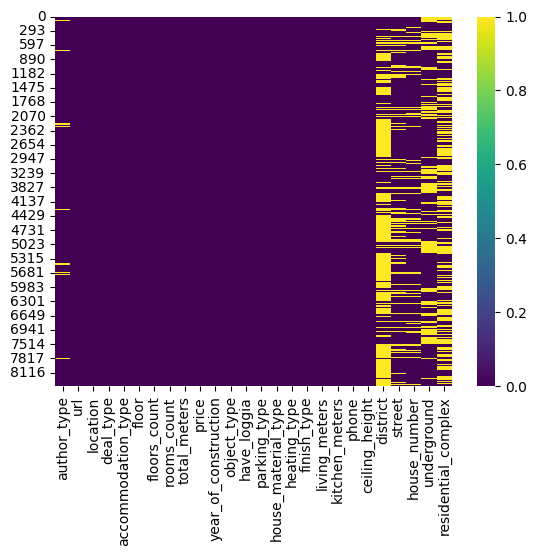

In [4]:
sns.heatmap(df.isnull(), cmap = "viridis") #Отображает нулевые значения

In [5]:
print(df["district"].isnull().sum(),"-nulls in district")
print(df["underground"].isnull().sum(),"-nulls in underground")
print(df["residential_complex"].isnull().sum(),"-nulls in residential_complex")
print(df["street"].isnull().sum(),"-nulls in street")

4583 -nulls in district
2277 -nulls in underground
3778 -nulls in residential_complex
1575 -nulls in street


In [6]:
df['district'].fillna(df['location'], inplace=True)
df['underground'].fillna(df['district'], inplace=True)
df['residential_complex'].fillna(df['underground'], inplace=True)


df.drop(['house_number'], axis=1,inplace=True)
df = df.dropna()





C:\Users\_\AppData\Local\Temp\ipykernel_17256\4238006199.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['district'].fillna(df['location'], inplace=True)
C:\Users\_\AppData\Local\Temp\ipykernel_17256\4238006199.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

<Axes: >

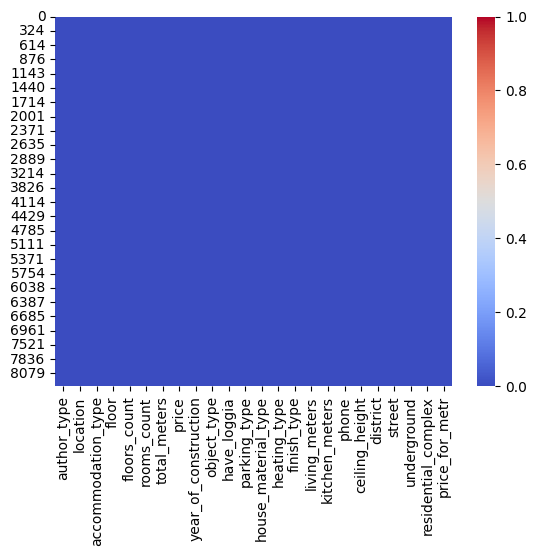

In [18]:
sns.heatmap(df.isnull(), cmap = "coolwarm")

# Приведение типов

In [8]:
df['floor'] = pd.to_numeric(df['floor'], errors='coerce')
df['floors_count'] = pd.to_numeric(df['floors_count'], errors='coerce')
df['total_meters'] = pd.to_numeric(df['total_meters'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['rooms_count'] = pd.to_numeric(df['rooms_count'], errors='coerce')


In [9]:
df['price_for_metr'] = round((df['price'] / df['total_meters']), 3)
df["price_for_metr"]

0       113526.570
1       125757.576
2       121428.571
3       142857.143
4       115830.116
           ...    
8385    188697.318
8387    199166.667
8388    163558.106
8390    162222.222
8391    188235.294
Name: price_for_metr, Length: 5930, dtype: float64

## Поиск выбросов

In [10]:
print(df.loc[df['price_for_metr'].idxmax()])
print(df.loc[df['floors_count'].idxmax()])
print(df.loc[df['rooms_count'].idxmax()])

author_type                                            developer
url                     https://www.cian.ru/sale/flat/308564823/
location                                                  Москва
deal_type                                                   sale
accommodation_type                                          flat
floor                                                        5.0
floors_count                                                 5.0
rooms_count                                                  5.0
total_meters                                               590.3
price                                               2361200000.0
year_of_construction                                        2027
object_type                                          Новостройка
have_loggia                                                   -1
parking_type                                                  -1
house_material_type                                           -1
heating_type             

In [11]:
df.drop(([df['rooms_count'].idxmax()]), axis = 0, inplace=True)
print(df.loc[df['rooms_count'].idxmax()])

author_type                                    real_estate_agent
url                     https://www.cian.ru/sale/flat/306835123/
location                                                  Москва
deal_type                                                   sale
accommodation_type                                          flat
floor                                                        4.0
floors_count                                                 8.0
rooms_count                                                  5.0
total_meters                                               117.0
price                                                 58500000.0
year_of_construction                                        1939
object_type                                             Вторичка
have_loggia                                             1 балкон
parking_type                                            Открытая
house_material_type                                           -1
heating_type             

#  Анализ

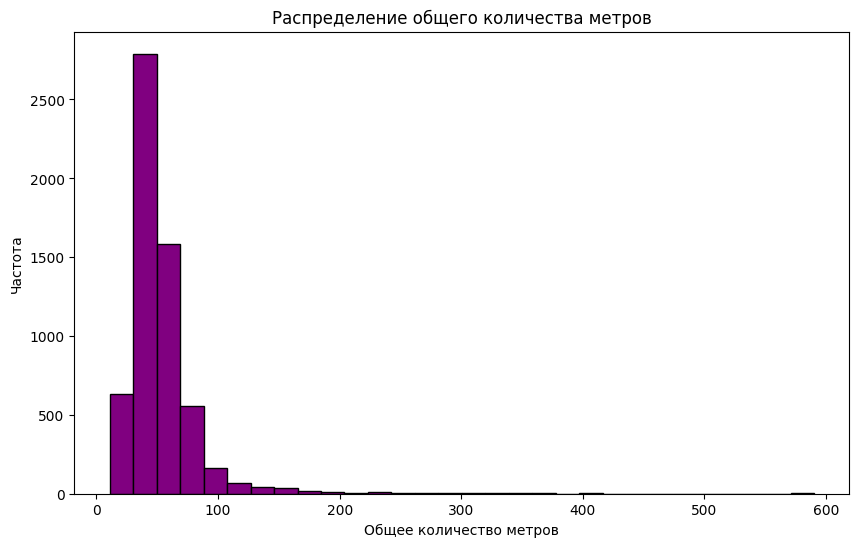

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['total_meters'], bins=30, color='purple', edgecolor='black')
plt.title('Распределение общего количества метров')
plt.xlabel('Общее количество метров')
plt.ylabel('Частота')
plt.show()

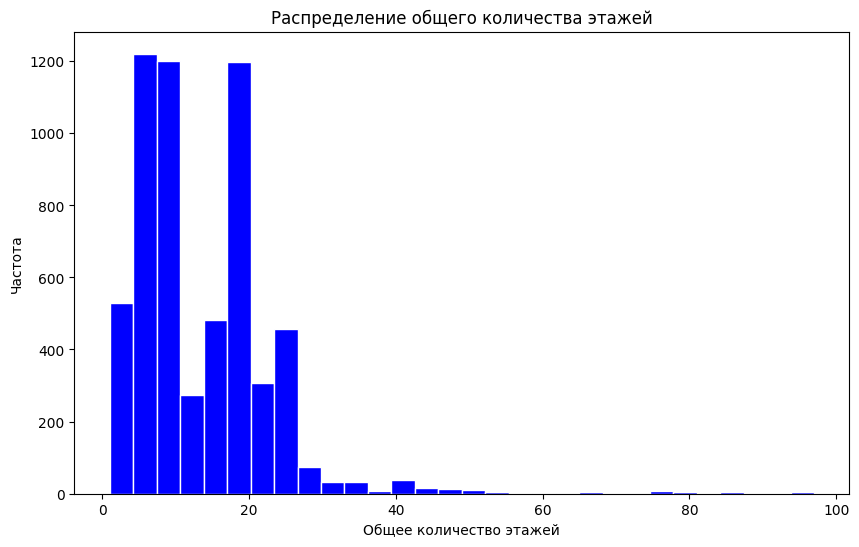

In [13]:

plt.figure(figsize=(10, 6))
plt.hist(df['floors_count'], bins=30, color='blue', edgecolor='white')
plt.title('Распределение общего количества этажей')
plt.xlabel('Общее количество этажей')
plt.ylabel('Частота')
plt.show()

Чаще всего встречаются 5 и 20 этажные здания. График выглядит реалистично. Здание с этажом 90+ действительно существует.

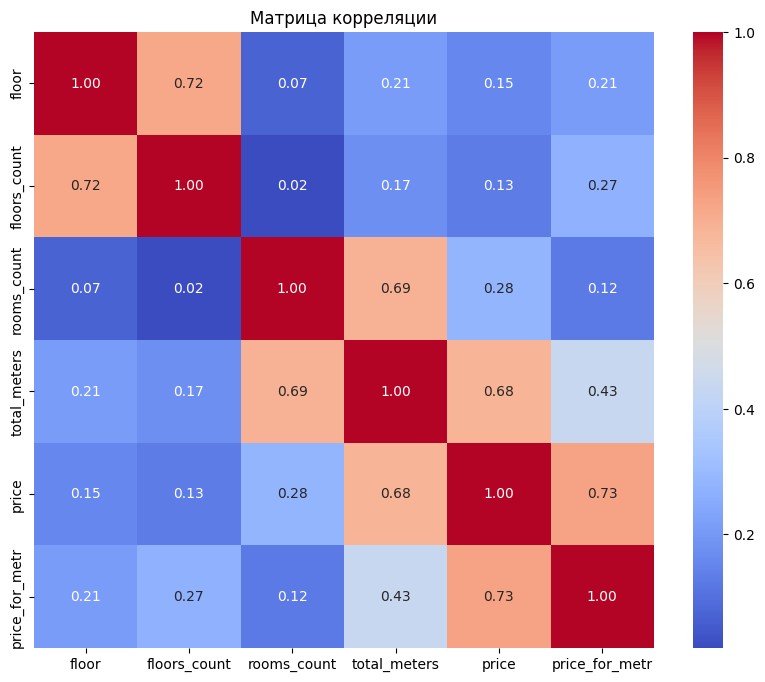

In [14]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Создаем матрицу корреляции
corr_matrix = df[numeric_cols].corr()

# Визуализация матрицы корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляции')
plt.show()

Целевая переменная значительно зависит от стоимости и площади квартиры, а чуть меньшее влияние оказывает количество комнат. На стоимость влияют площадь и число комнат. Этажность связана с количеством этажей в доме. Площадь имеет корреляцию с числом комнат и стоимостью.

# Преобразование категориальных данных в числа

In [15]:
df.drop(['url'], axis=1,inplace=True) # точно не влияет
df.drop(['deal_type'], axis=1,inplace=True) # везде sale

In [16]:
from sklearn.preprocessing import OrdinalEncoder

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

ordinal_encoder = OrdinalEncoder()
encoded_data = ordinal_encoder.fit_transform(df[categorical_columns])
df[categorical_columns] = encoded_data.astype(int)


df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5929 entries, 0 to 8391
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author_type           5929 non-null   int64  
 1   location              5929 non-null   int64  
 2   accommodation_type    5929 non-null   int64  
 3   floor                 5928 non-null   float64
 4   floors_count          5928 non-null   float64
 5   rooms_count           5928 non-null   float64
 6   total_meters          5928 non-null   float64
 7   price                 5928 non-null   float64
 8   year_of_construction  5929 non-null   int64  
 9   object_type           5929 non-null   int64  
 10  have_loggia           5929 non-null   int64  
 11  parking_type          5929 non-null   int64  
 12  house_material_type   5929 non-null   int64  
 13  heating_type          5929 non-null   int64  
 14  finish_type           5929 non-null   int64  
 15  living_meters         5929

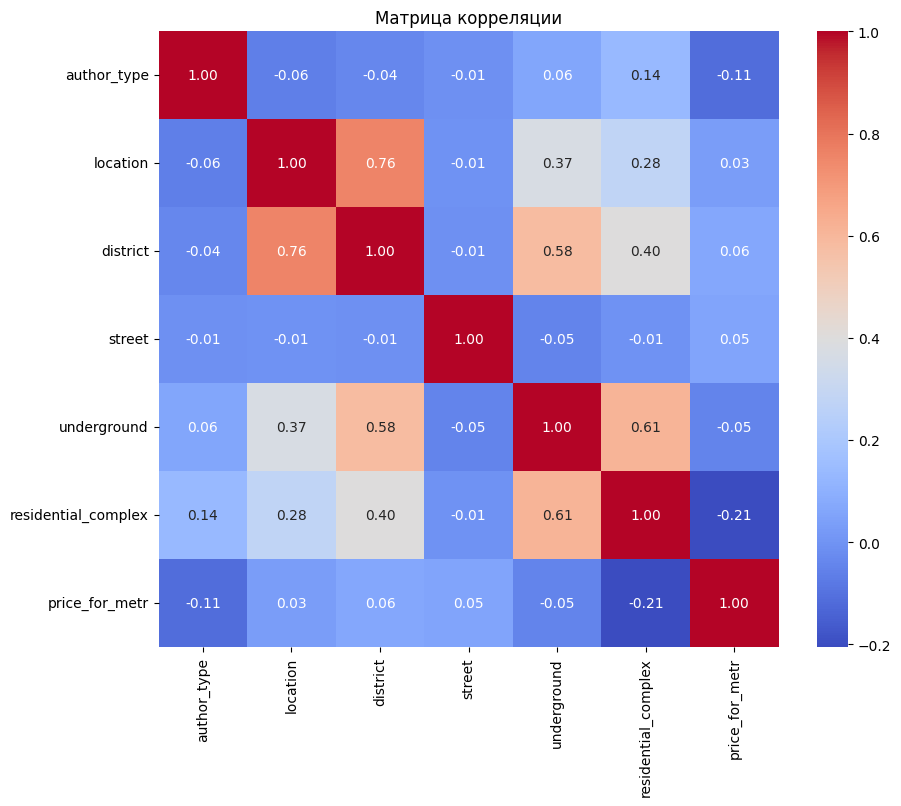

In [17]:
numeric_cols = ["author_type",'location','district',"street","underground","residential_complex","price_for_metr"]

# Создаем матрицу корреляции
corr_matrix = df[numeric_cols].corr()

# Визуализация матрицы корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляции')
plt.show()

Расположение оказывает очень слабое влияние на целевую переменную.